In [2]:

from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


In [3]:
%cd /content/gdrive/My Drive/codeR

/content/gdrive/My Drive/codeR


In [5]:
import numpy as np
import pandas as pd
import cv2
from sklearn.utils import shuffle
from glob import glob
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
import warnings
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
#from keras.layers.pooling import MaxPool2D
from tensorflow.keras.layers import MaxPooling2D


import tensorflow.keras.applications as models
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.layers.experimental import preprocessing


# from keras.preprocessing.image import ImageDataGenerator
from keras import layers, regularizers, optimizers, callbacks
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



In [ ]:
# pp='finalirisdataset2_original_100.499.jpg_1992b1ba-3d87-4d5a-ae60-ca2c8912284c.jpg'
# pp.split('_')[2].split('.')[0]


##Data augmentation

https://github.com/mdbloice/Augmentor

In [ ]:
count=0
data_dir= r'/content/gdrive/My Drive/codeR/Iris-Biometric-Identification-main/image processing/training/Sessao_result'
for filename in os.listdir(data_dir):
  count+=1

In [ ]:
count

100

In [ ]:
identity = pd.DataFrame(columns=['image_number','image_name', 'id'])
data_dir= r'/content/gdrive/My Drive/codeR/Iris-Biometric-Identification-main/image processing/training/Sessao_result'

for filename in os.listdir(data_dir):


  id= filename.split('.')[0]
  image_number= filename.split('.')[1]
  # print(id)

  identity = identity._append({'image_number': str(image_number),'image_name': str(filename), 'id': int(id)}, ignore_index=True)
  # sorted_identity = identity.sort_values(by='image_number')
  # print(sorted_identity)



identity


,image_number,image_name,id
0,100,20.100.jpg,20
1,37,8.37.jpg,8
2,31,7.31.jpg,7
3,99,20.99.jpg,20
4,59,12.59.jpg,12
...,...,...,...
95,5,1.5.jpg,1
96,1,1.1.jpg,1
97,12,3.12.jpg,3
98,3,1.3.jpg,1


In [ ]:
y= identity['id']
y_set = set(y)
number_of_unique_values = len(y_set)
print('number of identities in our dataset:',number_of_unique_values)


number of identities in our dataset: 20


In [ ]:
y=pd.get_dummies(y)

In [ ]:
# y=to_categorical(y, num_classes=number_of_unique_values)

In [ ]:
y.shape

(100, 20)

In [ ]:
img_size=170
def load_images_OpenCv(images, data_dir):

    for filename in os.listdir(data_dir):
        img = cv2.imread(os.path.join(data_dir,filename),cv2.COLOR_BGR2RGB)


        img_resize = cv2.resize(img, (img_size, img_size))
        if img is not None:
            images.append(img_resize)
    return images

In [ ]:
images = []

images = load_images_OpenCv(images, data_dir)

np.shape(images)

(100, 170, 170, 3)

In [ ]:
images=np.asarray(images)
images.shape

(100, 170, 170, 3)

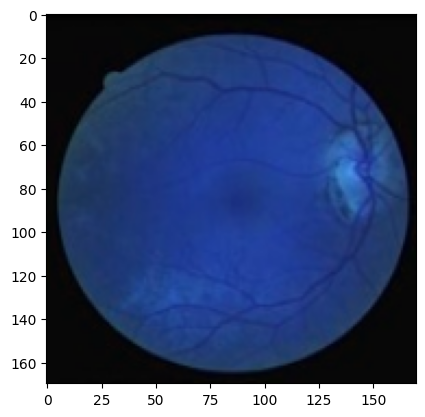

In [ ]:
imgplot = plt.imshow(images[1])
img=images[99]



In [ ]:
identity.iloc[4]


image_number           59
image_name      12.59.jpg
id                     12
Name: 4, dtype: object

In [ ]:
images[0].shape

(170, 170, 3)

In [ ]:
X = images[:,:,:,:].astype('float32') / 255
X.shape

(100, 170, 170, 3)

In [ ]:
print('shape of images:', X.shape, '\nshape of labels:',y.shape)

shape of images: (100, 170, 170, 3) 
shape of labels: (100, 20)


In [ ]:
X, y = shuffle(X, y)
print('shape of images:', X.shape, '\nshape of labels:',y.shape)

shape of images: (100, 170, 170, 3) 
shape of labels: (100, 20)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True)
print('number of images for train:',X_train.shape[0],
      '\nnumber of images for test:', X_test.shape[0])

number of images for train: 80 
number of images for test: 20


In [ ]:
final_Dense_units = [y.shape[0],y.shape[1]]

In [ ]:
final_Dense_units[1]

20

In [ ]:
from tensorflow.keras.applications import MobileNet
# from tensorflow.keras import layers, models
# from tensorflow.keras.applications import VGG16
# from tensorflow.keras.applications import EfficientNetB2
# from tensorflow.keras.applications import DenseNet121

In [ ]:

base_model = keras.applications.MobileNet(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(170, 170, 3),
    include_top=False,
    classes=number_of_unique_values  # Nombre de classes dans votre problème.
)


17225924/17225924 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

for layer in base_model.layers[:-5]:   #n laye akhar freez nashe
    layer.trainable = True

In [ ]:
from keras import layers

In [ ]:
nets = 1
model = [0] * nets
final_Dense_units = [y.shape[0],y.shape[1]]
model_name = ['RetinaID_Mod']
for i in range(nets):
    model[i] = Sequential(name=model_name[i])
    model[i].add(base_model)

    model[i].add(layers.Conv2D(60, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model[i].add(layers.BatchNormalization())
    model[i].add(layers.MaxPool2D((2, 2)))
#     model[i].add(layers.Conv2D(64,(3 ,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
#     model[i].add(layers.BatchNormalization())
#     model[i].add(layers.MaxPool2D((1, 1)))
    # model[i].add(layers.Conv2D(50,(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    # model[i].add(layers.BatchNormalization())
    # model[i].add(layers.MaxPool2D((2, 2)))
    # model[i].add(layers.Dropout(0.3))
    model[i].add(layers.Flatten())
    model[i].add(layers.Dense(50, activation='relu'))
    model[i].add(layers.Dropout(0.4))
    # model[i].add(layers.Dense(50, activation='relu'))
    # model[i].add(layers.Dropout(0.4))
    model[i].add(layers.Dense(final_Dense_units[1], activation='softmax'))

    # Complete with Adam optimizer and entropy cost
    model[i].compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
    model[i].summary()

Model: "RetinaID_Mod"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 5, 5, 1024)        3228864   
 onal)                                                           
                                                                 
 conv2d (Conv2D)             (None, 3, 3, 60)          553020    
                                                                 
 batch_normalization (Batch  (None, 3, 3, 60)          240       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 1, 1, 60)          0         
 D)                                                              
                                                                 
 flatten_1 (Flatten)         (None, 60)                0         
                                                      

In [ ]:
pip install graphviz

In [ ]:
pip install pydot

In [ ]:
pip install pydotplus

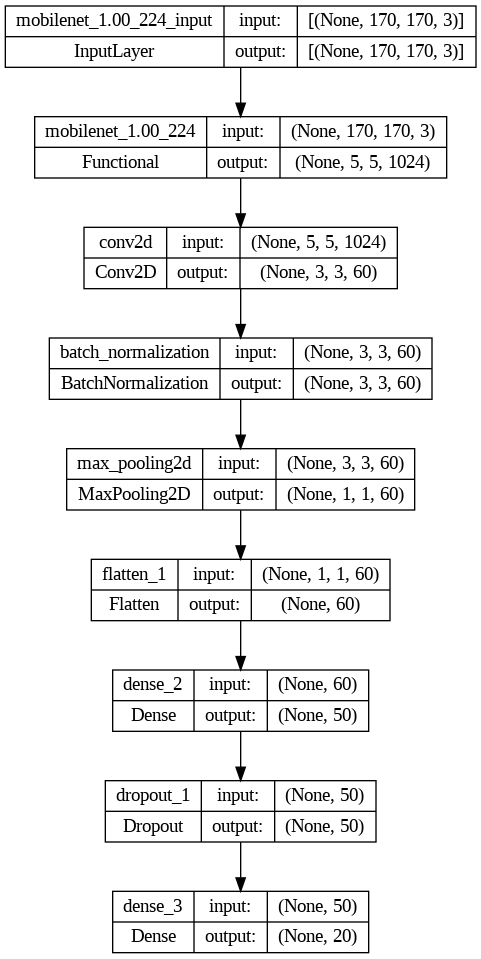

In [ ]:
#Plot Id model graph in layers
plot_model(model[0], show_shapes=True, show_layer_names=True)



In [ ]:
history = [0] * nets
CallBack = [0] * nets
ReduceLR_minlr = [1e-9, 1e-7]
epochs = 150
batch_size = 16
for i in range(nets):
    CallBack[i] = [
        callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1),
        callbacks.ReduceLROnPlateau(factor=0.1, patience=1, min_lr=ReduceLR_minlr[i], verbose=1)]
#         callbacks.TensorBoard(log_dir="./log_dir/"+model_name[i])]
history[0] = model[0].fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    validation_data = (X_test, y_test),
                    verbose = 1, callbacks= CallBack[0])
model[0].save(r'/content/gdrive/My Drive/codeR/Iris-Biometric-Identification-main/result')
# Load the TensorBoard notebook extension
# %load_ext tensorboard
# Launch TensorBoard
# Supervising the SubjectID model
# %tensorboard --logdir '/content/log_dir/IrisID_Mod'
# or, supervising the fingerNum model
# %tensorboard --logdir './log_dir/fingerNum_log'

Epoch 1/150
5/5 [==============================] - 8s 1s/step - loss: 3.8769 - accuracy: 0.0750 - val_loss: 5.3512 - val_accuracy: 0.1500 - lr: 0.0010
Epoch 2/150
5/5 [==============================] - 3s 556ms/step - loss: 2.1860 - accuracy: 0.4125 - val_loss: 4.0244 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 3/150
5/5 [==============================] - 3s 559ms/step - loss: 1.6643 - accuracy: 0.5500 - val_loss: 3.1624 - val_accuracy: 0.3000 - lr: 0.0010
Epoch 4/150
5/5 [==============================] - 3s 545ms/step - loss: 1.2792 - accuracy: 0.6875 - val_loss: 2.5255 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 5/150
5/5 [==============================] - 3s 759ms/step - loss: 1.1126 - accuracy: 0.7375 - val_loss: 2.1160 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 6/150
5/5 [==============================] - 5s 972ms/step - loss: 0.8975 - accuracy: 0.7875 - val_loss: 1.8115 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 7/150
5/5 [==============================] - 3s 559ms/step - loss: 0.8318

In [ ]:
# model[0].save('//content/gdrive/My Drive/codeR/Iris-Biometric-Identification-main/image processing/modellVGG16.h5')

In [ ]:
# # Load the TensorBoard notebook extension
# %load_ext tensorboard
# # Launch TensorBoard
# # Supervising the SubjectID model
# %tensorboard --logdir '/content/log_dir/IrisID_Mod'
# # or, supervising the fingerNum model
# # %tensorboard --logdir './log_dir/fingerNum_log'

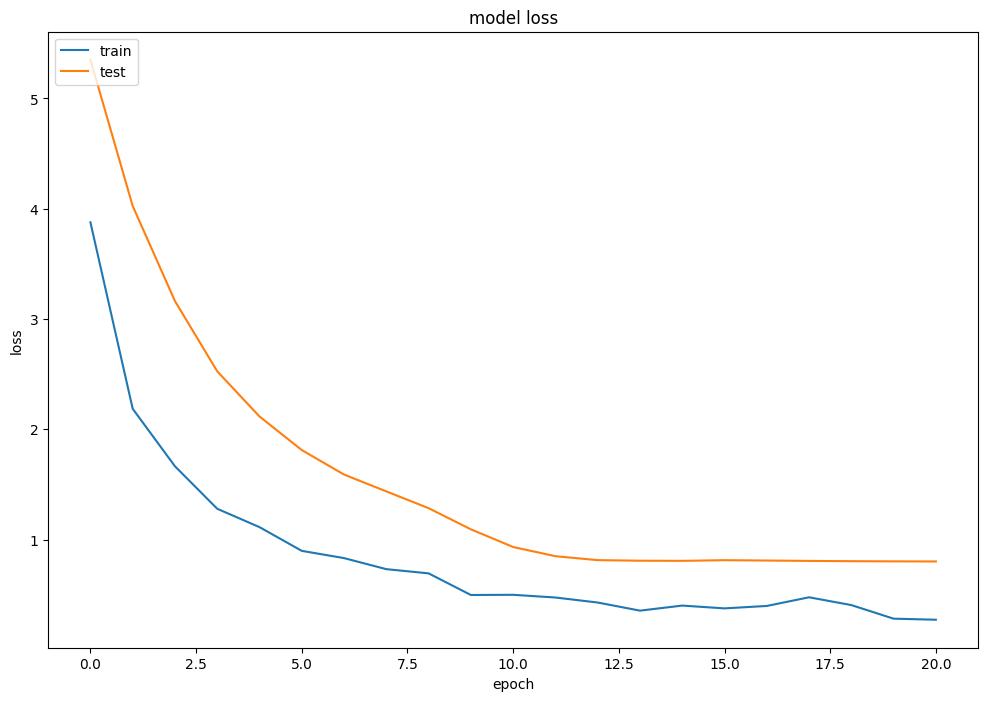

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history[0].history['loss'])
plt.plot(history[0].history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/gdrive/My Drive/codeR/Iris-Biometric-Identification-main/figures/loss_plot.png')

plt.show()

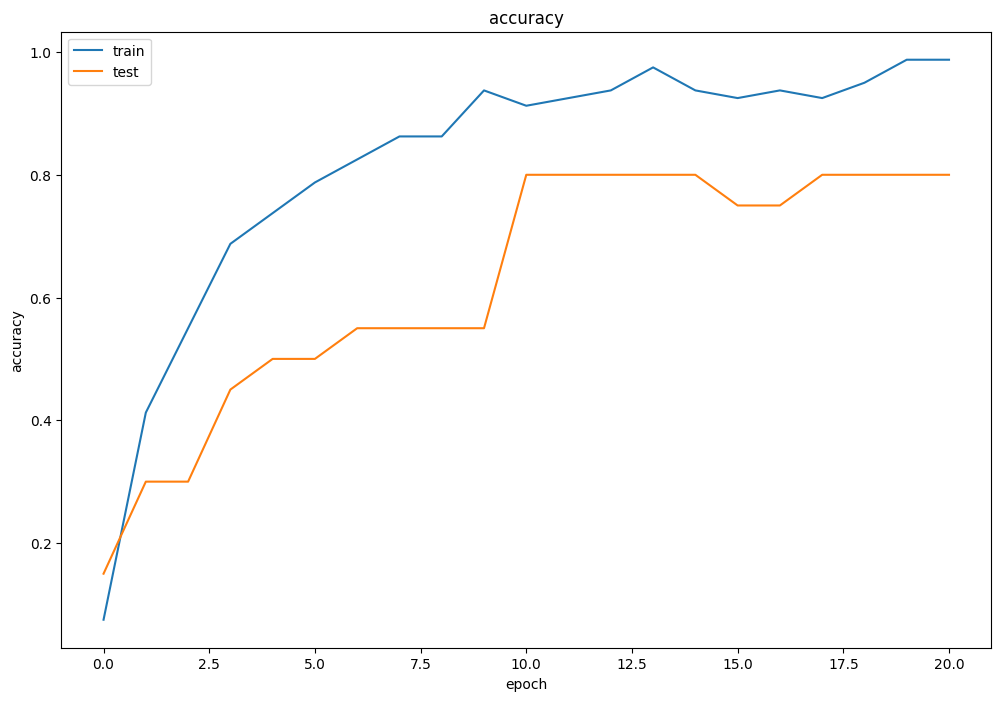

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history[0].history['accuracy'])
plt.plot(history[0].history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/gdrive/My Drive/codeR/Iris-Biometric-Identification-main/figures/accuracy_plot.png')

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score , precision_score , f1_score , recall_score


In [ ]:
y_test=np.array(y_test)

In [ ]:
y_class=np.argmax(y_test,axis=1)

In [ ]:
y_class

array([17,  1,  0,  8, 10,  6,  4,  5,  9,  7,  6,  1,  2,  7, 19, 11, 10,
       13,  3, 17])

In [ ]:
from keras.models import load_model
model=load_model(r'/content/gdrive/My Drive/codeR/Iris-Biometric-Identification-main/result')

In [ ]:
y_pred=model.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [ ]:
y_pred=np.argmax(y_pred,axis=1)

In [ ]:
y_pred

array([17,  1,  0,  8, 10,  1,  4,  5,  9,  3,  6,  1,  2,  3, 19, 11, 10,
       13,  3,  4])

In [ ]:
y_pred_encod=pd.get_dummies(y_pred)

In [ ]:
y_pred_encod

,0,1,2,3,4,5,6,8,9,10,11,13,17,19
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False,False,False,False
5,False,True,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,True,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,True,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,True,False,False,False,False,False
9,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [ ]:
acc=accuracy_score(y_class, y_pred)
recal=recall_score(y_class, y_pred,average='weighted')
precision=precision_score(y_class, y_pred,average='weighted')
f1score=f1_score(y_class, y_pred,average='weighted')


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Accuracy is  '+str(acc) ,end='\n' )
print('Precision is  '+str(precision), end='\n' )
print('Recall is  '+str(recal) ,end='\n' )
print('F1 Score is  '+str(f1score) ,end='\n' )

Accuracy is  0.8
Precision is  0.8083333333333332
Recall is  0.8
F1 Score is  0.7716666666666667


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
y_true=y_class

In [ ]:
y_pred_without_duplicates = list(set(y_pred))

In [ ]:
y_class_without_duplicates = list(set(y_class))

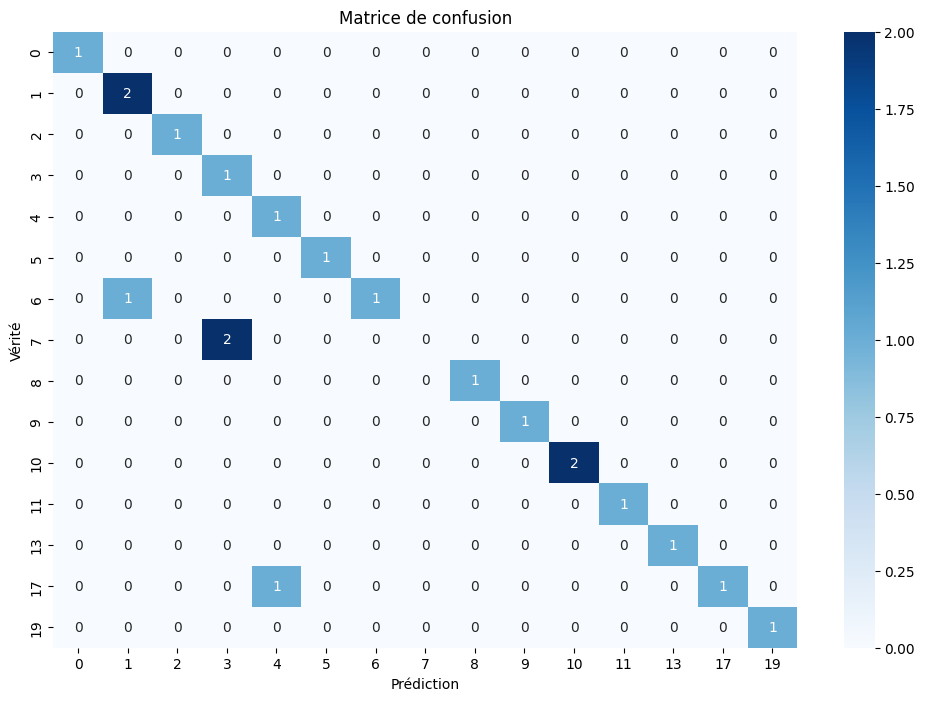

In [ ]:
# Déterminer toutes les classes réelles et prédites
all_classes = set(y_true).union(set(y_pred))

# Créer la matrice de confusion avec les classes manquantes
cm = confusion_matrix(y_true, y_pred, labels=list(all_classes))

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=list(all_classes), yticklabels=list(all_classes))
plt.xlabel('Prédiction')
plt.ylabel('Vérité')
plt.title('Matrice de confusion')
plt.savefig('/content/gdrive/My Drive/codeR/Iris-Biometric-Identification-main/figures/Matrice de confusion.png')

plt.show()
